In [341]:
import matplotlib.pyplot as plt
from processing import *

## Geographically visualise datapoints

## just 2015

In [260]:
# Load data
data_2015 = xr.open_dataset('../data/yearly_discharge/discharge_2015.nc')
df = data_2015.to_dataframe()
df.reset_index(inplace=True)

# drop missing
df.replace(1e20, np.nan, inplace=True)
df.dropna(inplace=True)

# to_plot = df[df['time']=='2015-01-01']
# to_plot

#### map

In [261]:
crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]

geo_df = gpd.GeoDataFrame(df, 
                          crs=crs, 
                          geometry=geometry)
geo_df.head()

/Users/smart/Library/Python/3.9/lib/python/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,time,lon,lat,dis24,geometry
0,2015-01-01,60.05,37.95,0.000119,POINT (60.05000 37.95000)
1,2015-01-01,60.05,37.85,0.001098,POINT (60.05000 37.85000)
2,2015-01-01,60.05,37.75,0.000071,POINT (60.05000 37.75000)
3,2015-01-01,60.05,37.65,0.000046,POINT (60.05000 37.65000)
4,2015-01-01,60.05,37.55,0.000217,POINT (60.05000 37.55000)


<Axes: >

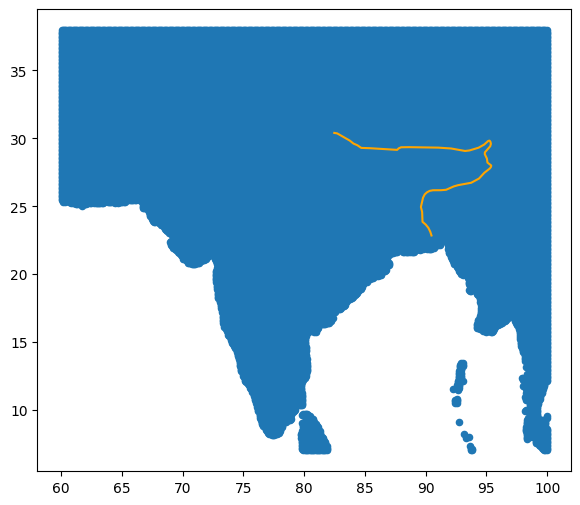

In [262]:
fig, ax = plt.subplots(figsize=(13,6))

river_map = gpd.read_file('../data/centerlines_data/ne_110m_rivers_lake_centerlines.shp')
brahmaputra = river_map[river_map['name'] == 'Brahmaputra']

geo_df[geo_df['time']=='2015-01-01'].plot(ax=ax, markersize=20, marker='o')
brahmaputra.plot(ax=ax, color='orange')

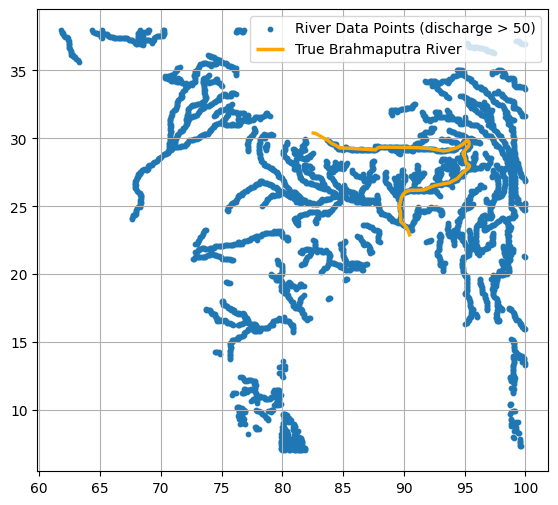

In [263]:
fig, ax = plt.subplots(figsize=(13,6))

geo_df[(geo_df['time']=='2015-01-01') & (geo_df['dis24'] > 30)].plot(ax=ax, markersize=10, marker='o', label='River Data Points (discharge > 50)')
brahmaputra.plot(ax=ax, color='orange', linewidth=2.5, label='True Brahmaputra River')

plt.legend()
plt.grid(True)

add other rivers to the plot in another colour 

axes, labels 

other features? 

In [264]:
geo_df.shape

(28375830, 5)

In [265]:
river_linestring = brahmaputra.iloc[0]['geometry']
river_points = list(river_linestring.coords)
min(river_points), max(river_points)

## do this to also check for second lat values (could reduce size of data)

((82.40047977084697, 30.411477362585146),
 (95.39648237506563, 28.002916368109368))

In [308]:
filtered_df = filter_relevant(geo_df)
filtered_df.shape

## Get closest points to river

In [324]:
geo_points = get_closest(filtered_df, river_points, 3)

Finished finding closest points, converting to geo.


/Users/smart/Library/Python/3.9/lib/python/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


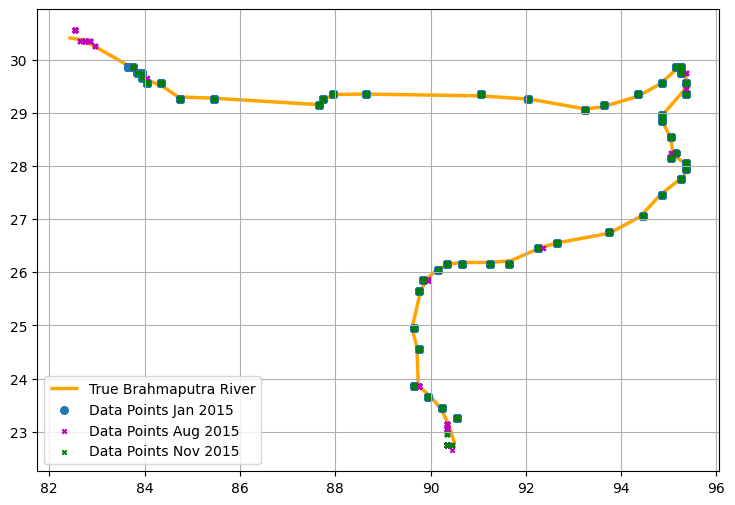

In [333]:
fig, ax = plt.subplots(figsize=(13, 6))

brahmaputra.plot(ax=ax, color='orange', linewidth=2.5, label='True Brahmaputra River', zorder=0)

# geo_points['time'] = pd.to_datetime(geo_points['time'])
# geo_points.plot(ax=ax, markersize=10, marker='o', label='Data Points Jan 2015')

january_data = geo_points[(geo_points['time'].dt.month == 1)]
january_data.plot(ax=ax, markersize=30, marker='o', label='Data Points Jan 2015')

aug_data = geo_points[(geo_points['time'].dt.month == 8)]
aug_data.plot(ax=ax, markersize=10, marker='x', color='m', label='Data Points Aug 2015')

nov_data = geo_points[(geo_points['time'].dt.month == 11)]
nov_data.plot(ax=ax, markersize=10, marker='x', color='g', label='Data Points Nov 2015')

plt.grid(True)
plt.legend()


# All Years

/Users/smart/Library/Python/3.9/lib/python/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Finished finding closest points, converting to geo.


/Users/smart/Library/Python/3.9/lib/python/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/smart/Library/Python/3.9/lib/python/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


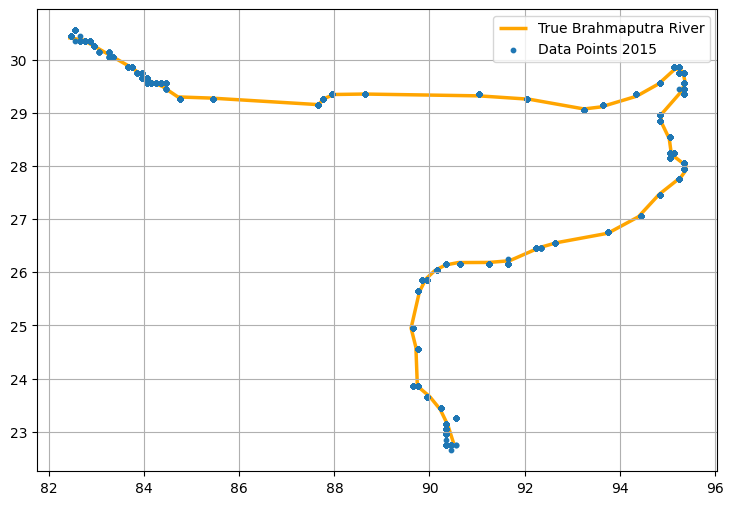

In [342]:
# Load 2015 data
data_2015 = loader('../data/yearly_discharge/discharge_2015.nc')
filtered_df_2015 = filter_relevant(data_2015)
geo_points_2015 = get_closest(filtered_df_2015, river_points, 3)
geo_points_2015 = remove_outliers(geo_points_2015)

fig, ax = plt.subplots(figsize=(13, 6))

brahmaputra.plot(ax=ax, color='orange', linewidth=2.5, label='True Brahmaputra River', zorder=0)

geo_points_2015['time'] = pd.to_datetime(geo_points['time'])
geo_points_2015.plot(ax=ax, markersize=10, marker='o', label='Data Points 2015')

plt.grid(True)
plt.legend()
plt.show()

In [343]:
# Load 2016 data
data_2016 = loader('../data/yearly_discharge/discharge_2016.nc')
filtered_df_2016 = filter_relevant(data_2016)
geo_points_2016 = get_closest(filtered_df_2016, river_points, 3)
geo_points_2016 = remove_outliers(geo_points_2016)

fig, ax = plt.subplots(figsize=(13, 6))

brahmaputra.plot(ax=ax, color='orange', linewidth=2.5, label='True Brahmaputra River', zorder=0)

geo_points_2016['time'] = pd.to_datetime(geo_points_2016['time'])
geo_points_2016.plot(ax=ax, markersize=10, marker='o', label='Data Points 2016')

plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# not saved to data folder, which is in gitignore
# geo_points.to_csv('../clean_data/cleaned_2016.csv', index=False)

In [ ]:
# Load 2017 data
data_2017 = loader('../data/yearly_discharge/discharge_2017.nc')
filtered_df_2017 = filter_relevant(data_2017)
geo_points_2017 = get_closest(filtered_df_2017, river_points, 3)
geo_points_2017 = remove_outliers(geo_points_2017)

fig, ax = plt.subplots(figsize=(13, 6))

brahmaputra.plot(ax=ax, color='orange', linewidth=2.5, label='True Brahmaputra River', zorder=0)

geo_points_2017['time'] = pd.to_datetime(geo_points_2017['time'])
geo_points_2017.plot(ax=ax, markersize=10, marker='o', label='Data Points 2017')

plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Load 2018 data
data_2018 = loader('../data/yearly_discharge/discharge_2018.nc')
filtered_df_2018 = filter_relevant(data_2018)
geo_points_2018 = get_closest(filtered_df_2018, river_points, 3)
geo_points_2018 = remove_outliers(geo_points_2018)

fig, ax = plt.subplots(figsize=(13, 6))

brahmaputra.plot(ax=ax, color='orange', linewidth=2.5, label='True Brahmaputra River', zorder=0)

geo_points_2018['time'] = pd.to_datetime(geo_points_2018['time'])
geo_points_2018.plot(ax=ax, markersize=10, marker='o', label='Data Points 2018')

plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Load 2019 data
data_2019 = loader('../data/yearly_discharge/discharge_2019.nc')
filtered_df_2019 = filter_relevant(data_2019)
geo_points_2019 = get_closest(filtered_df_2019, river_points, 3)
geo_points_2019 = remove_outliers(geo_points_2019)

fig, ax = plt.subplots(figsize=(13, 6))

brahmaputra.plot(ax=ax, color='orange', linewidth=2.5, label='True Brahmaputra River', zorder=0)

geo_points_2019['time'] = pd.to_datetime(geo_points_2019['time'])
geo_points_2019.plot(ax=ax, markersize=10, marker='o', label='Data Points 2019')

plt.grid(True)
plt.legend()
plt.show()

In [235]:
# Open the netCDF file using xarray
data_2015 = xr.open_dataset('../data/yearly_discharge/discharge_2015.nc')

# Convert the xarray Dataset to a pandas DataFrame
df = data_2015.to_dataframe()

# Reset the index to flatten the multi-index DataFrame
df.reset_index(inplace=True)

# drop missing
df.replace(1e20, np.nan, inplace=True)
df.dropna(inplace=True)

to_plot = df[df['time']=='2015-01-01']

crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(to_plot['lon'], to_plot['lat'])]

geo_df = gpd.GeoDataFrame(to_plot, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created
geo_df.head()

dis_threshold = 30  # Define threshold for "close to zero" (using above plot)
mask = (geo_df['dis24'].abs() > dis_threshold) & (geo_df['lon'] > 81) & (geo_df['lon'] < 96) & (geo_df['lat'] > 22) & (geo_df['lat'] < 31)
filtered_df = geo_df[mask]

/Users/smart/Library/Python/3.9/lib/python/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [236]:
# Convert river to a list of individual points (lon, lat)
river_linestring = brahmaputra.iloc[0]['geometry']
river_points = list(river_linestring.coords)

# Create a list to store the closest points
closest_points = []

# Iterate over each true coordinate in river_points
for true_coord in river_points:
    true_point = Point(true_coord)
    min_distance = float('inf')  # Initialise with infinity
    closest_point = None
    
    # Iterate over each row in filtered_df
    for index, row in filtered_df.iterrows():
        # Check if the 'geometry' column contains a valid geometry object
        if not pd.isna(row['geometry']):
            # Calculate distance between true_point and row's geometry
            distance = calculate_distance(row['geometry'], true_point)
            # Check if this distance is smaller than the current minimum
            if distance < min_distance:
                min_distance = distance
                closest_point = index  # Store the index of the closest row
    
    # Append the index of the closest point to the list
    closest_points.append(closest_point)

# Filter out only the rows with closest points
one_day_filtered_2015 = filtered_df.loc[closest_points]

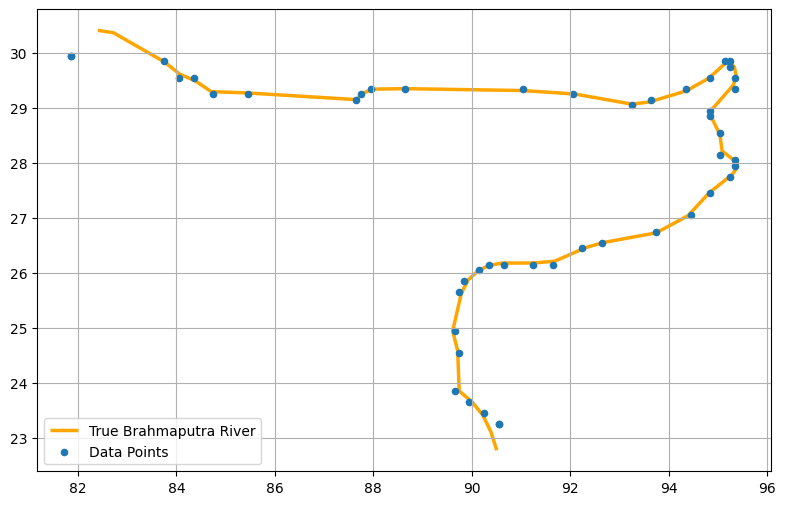

In [238]:
fig, ax = plt.subplots(figsize=(13,6))

brahmaputra.plot(ax=ax, color='orange', linewidth=2.5, label='True Brahmaputra River', zorder=0)
one_day_filtered_2015[one_day_filtered_2015['time']=='2015-01-01'].plot(ax=ax, markersize=20, marker='o', label='Data Points', zorder=1)

plt.legend()
plt.grid(True)

In [240]:
one_day_filtered_2015.shape

(48, 5)

In [145]:
# not saved to data folder, which is in gitignore
one_day_filtered_2015.to_csv('../river_data.csv', index=False)

In [ ]:
# # Create an empty DataFrame to store the closest points
# closest_points = pd.DataFrame(columns=filtered_df.columns)

# # Iterate over each unique day in the 'time' column
# for day, one_day_data in filtered_df.groupby(filtered_df['time'].dt.to_period('D')):
#     # Create a BallTree for the current day's data
#     tree = BallTree(one_day_data['geometry'].apply(lambda x: [x.coords[0][0], x.coords[0][1]]).tolist())
    
#     # Find the closest points in one_day_data to each point in river_points
#     for true_coord in river_points:
#         true_point = Point(true_coord)
#         _, ind = tree.query([[true_point.x, true_point.y]], k=5)  # Find 5 nearest neighbors
        
#         # Check if ind array is not empty
#         if len(ind) > 0:
#             # Choose the closest point among the 5 nearest neighbors
#             min_distance = float('inf')
#             closest_row = None

#             for i in ind[0]:
#                 distance = calculate_distance(one_day_data.iloc[i]['geometry'], true_point)
#                 if distance < min_distance:
#                     min_distance = distance
#                     closest_row = one_day_data.iloc[i]
            
#             #closest_points = closest_points.append(closest_row, ignore_index=True)
#             closest_points.loc[len(closest_points.index)] = closest_row